# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd

C:\Users\alimu\AppData\Local\Temp\ipykernel_8372\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-01-2020.csv')
covid_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-02 02:32:27,34.223334,-82.461707,31,0,0,31,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-02 02:32:27,30.295065,-92.414197,133,10,0,123,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-02 02:32:27,37.767072,-75.632346,303,5,0,298,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-02 02:32:27,43.452658,-116.241552,681,16,0,665,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-02 02:32:27,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3221,82604.0,NaN,Wales,United Kingdom,2020-05-02 02:32:27,52.130700,-3.783700,0,1681,0,0,"Wales, United Kingdom"
3222,NaN,NaN,NaN,Nauru,2020-05-02 02:32:27,-0.522800,166.931500,0,0,0,0,Nauru
3223,NaN,NaN,Niue,New Zealand,2020-05-02 02:32:27,-19.054400,-169.867200,0,0,0,0,"Niue, New Zealand"
3224,NaN,NaN,NaN,Tuvalu,2020-05-02 02:32:27,-7.109500,177.649300,0,0,0,0,Tuvalu


#### Display the top 5 rows in the data

In [3]:
covid_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-02 02:32:27,34.223334,-82.461707,31,0,0,31,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-02 02:32:27,30.295065,-92.414197,133,10,0,123,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-02 02:32:27,37.767072,-75.632346,303,5,0,298,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-02 02:32:27,43.452658,-116.241552,681,16,0,665,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-02 02:32:27,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


#### Show the information of the dataset

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2916 non-null   float64
 1   Admin2          2916 non-null   object 
 2   Province_State  3036 non-null   object 
 3   Country_Region  3226 non-null   object 
 4   Last_Update     3226 non-null   object 
 5   Lat             3157 non-null   float64
 6   Long_           3157 non-null   float64
 7   Confirmed       3226 non-null   int64  
 8   Deaths          3226 non-null   int64  
 9   Recovered       3226 non-null   int64  
 10  Active          3226 non-null   int64  
 11  Combined_Key    3226 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 302.6+ KB


#### Show the sum of missing values of features in the dataset

In [5]:
covid_data.isnull().sum()

FIPS              310
Admin2            310
Province_State    190
Country_Region      0
Last_Update         0
Lat                69
Long_              69
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [6]:
covid_data.groupby('Country_Region')['Confirmed'].sum().reset_index()

,Country_Region,Confirmed
0,Afghanistan,2171
1,Albania,782
2,Algeria,4154
3,Andorra,745
4,Angola,30
...,...,...
191,West Bank and Gaza,353
192,Winter Olympics 2022,0
193,Yemen,7
194,Zambia,109


#### Show the number of Deaths by Country

In [7]:
covid_data.groupby('Country_Region')['Deaths'].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,64
1,Albania,31
2,Algeria,453
3,Andorra,43
4,Angola,2
...,...,...
191,West Bank and Gaza,2
192,Winter Olympics 2022,0
193,Yemen,2
194,Zambia,3


#### Show the number of Recovered cases by Country

In [8]:
covid_data.groupby('Country_Region')['Recovered'].sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,310
1,Albania,488
2,Algeria,1821
3,Andorra,468
4,Angola,11
...,...,...
191,West Bank and Gaza,76
192,Winter Olympics 2022,0
193,Yemen,1
194,Zambia,74


#### Show the number of Active Cases by Country

In [9]:
covid_data.groupby('Country_Region')['Active'].sum().reset_index()

,Country_Region,Active
0,Afghanistan,1797
1,Albania,263
2,Algeria,1880
3,Andorra,234
4,Angola,17
...,...,...
191,West Bank and Gaza,275
192,Winter Olympics 2022,0
193,Yemen,4
194,Zambia,32


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [10]:
covid_data.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2171,64,310,1797
1,Albania,782,31,488,263
2,Algeria,4154,453,1821,1880
3,Andorra,745,43,468,234
4,Angola,30,2,11,17
...,...,...,...,...,...
191,West Bank and Gaza,353,2,76,275
192,Winter Olympics 2022,0,0,0,0
193,Yemen,7,2,1,4
194,Zambia,109,3,74,32


### Question 3

### Show the countries with no recovered cases

In [12]:
# covid_data.groupby('Country_Region')['Recovered'].sum().reset_index()
# covid_data[covid_data['Deaths'] > 10000].groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
# covid_data[covid_data['Recovered'] == 0].groupby('Country_Region')[Recovered'].sum().reset_index()

coun_w_no_rec = covid_data[covid_data['Recovered'] == 0]['Country_Region'].unique()
print(coun_w_no_rec)

['US' 'Canada' 'Netherlands' 'United Kingdom' 'France' 'Comoros'
 'MS Zaandam' 'Papua New Guinea' 'Samoa' 'South Sudan' 'Tajikistan'
 'China' 'Kiribati' 'Palau' 'New Zealand' 'Summer Olympics 2020'
 'Malaysia' 'Tonga' 'Winter Olympics 2022' 'Antarctica' 'Korea, North'
 'Ukraine' 'Nauru' 'Tuvalu']


#### Show the countries with no confirmed cases

In [14]:
covid_data[covid_data['Confirmed'] == 0]['Country_Region'].unique()

array(['US', 'United Kingdom', 'Canada', 'Samoa', 'Kiribati', 'Palau',
       'New Zealand', 'Summer Olympics 2020', 'Malaysia', 'Tonga',
       'Winter Olympics 2022', 'Antarctica', 'Korea, North', 'Ukraine',
       'Nauru', 'Tuvalu'], dtype=object)

#### Show the countries with no deaths

In [15]:
covid_data[covid_data['Deaths'] == 0]['Country_Region'].unique()

array(['US', 'United Kingdom', 'Netherlands', 'Denmark', 'France',
       'Canada', 'China', 'Australia', 'Bhutan', 'Cambodia',
       'Central African Republic', 'Comoros', 'Dominica', 'Eritrea',
       'Fiji', 'Grenada', 'Holy See', 'Laos', 'Madagascar', 'Mongolia',
       'Mozambique', 'Namibia', 'Nepal', 'Papua New Guinea', 'Rwanda',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Samoa', 'Seychelles',
       'South Sudan', 'Tajikistan', 'Timor-Leste', 'Uganda', 'Vietnam',
       'Kiribati', 'Palau', 'New Zealand', 'Summer Olympics 2020',
       'Malaysia', 'Tonga', 'Winter Olympics 2022', 'Antarctica',
       'Korea, North', 'Ukraine', 'Nauru', 'Tuvalu'], dtype=object)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country_Region,Confirmed,Deaths,Recovered
30,Cambodia,391,0,374
50,Dominica,106,0,98
75,Holy See,27,0,15
95,Laos,41,0,40
111,Marshall Islands,4,0,4
143,Saint Kitts and Nevis,34,0,31
145,Saint Vincent and the Grenadines,249,0,100
146,Samoa,2,0,2
157,Solomon Islands,17,0,10
172,Timor-Leste,49,0,41


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [18]:
covid_data.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

Country_Region
US                1104640
Spain              213435
Italy              207428
United Kingdom     178684
France             169387
Germany            164077
Turkey             122392
Russia             114431
Iran                95646
Brazil              92202
Name: Confirmed, dtype: int64

#### Show the Top 10 Countries with Active cases

In [19]:
covid_data.groupby('Country_Region')['Active'].sum().sort_values(ascending=False).head(10)

Country_Region
US                1039587
United Kingdom     150210
Italy              100943
Russia             100042
France              93666
Spain               76842
Turkey              65326
Canada              54168
Brazil              47751
Netherlands         34942
Name: Active, dtype: int64

### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [20]:
import matplotlib.pyplot as plt

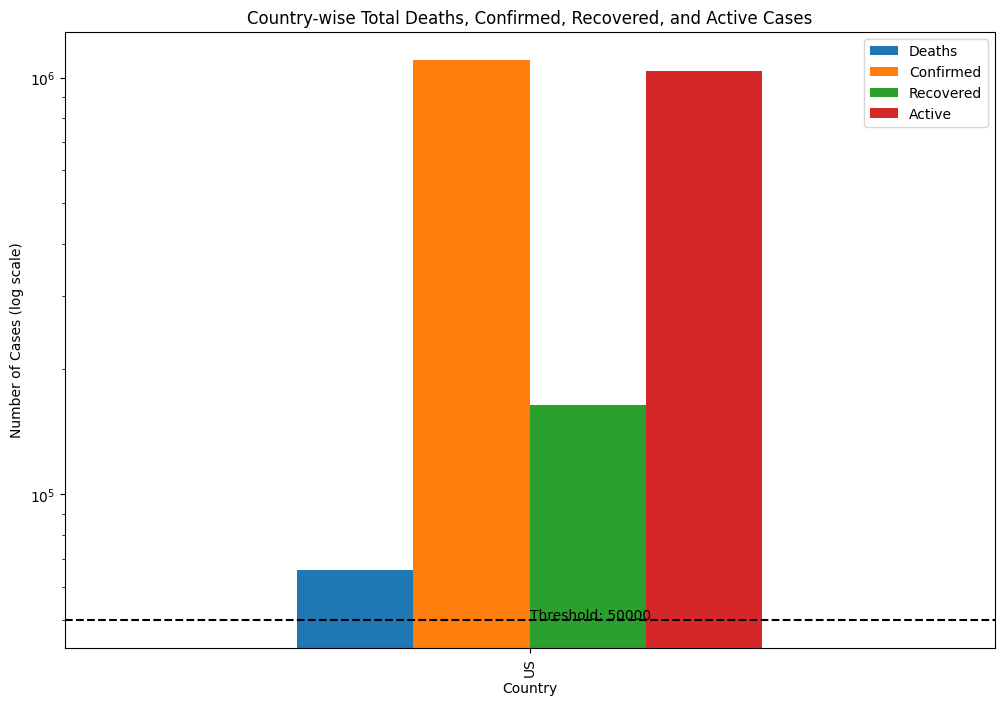

In [22]:
data = covid_data.groupby('Country_Region').agg({'Deaths': 'sum', 'Confirmed': 'sum', 'Recovered': 'sum', 'Active': 'sum'})

# Countries: Deaths > 50,000
data = data[data['Deaths'] > 50000]

data.plot(kind='bar', figsize=(12, 8))
plt.title('Country-wise Total Deaths, Confirmed, Recovered, and Active Cases')
plt.ylabel('Number of Cases (log scale)')
plt.xlabel('Country')

# Adding horizontal line at - y=50000
plt.axhline(y=50000, color='black', linestyle='--')
plt.text(0, 50000, 'Threshold: 50000', color = 'black')

plt.yscale('log')

plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [24]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [25]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [26]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

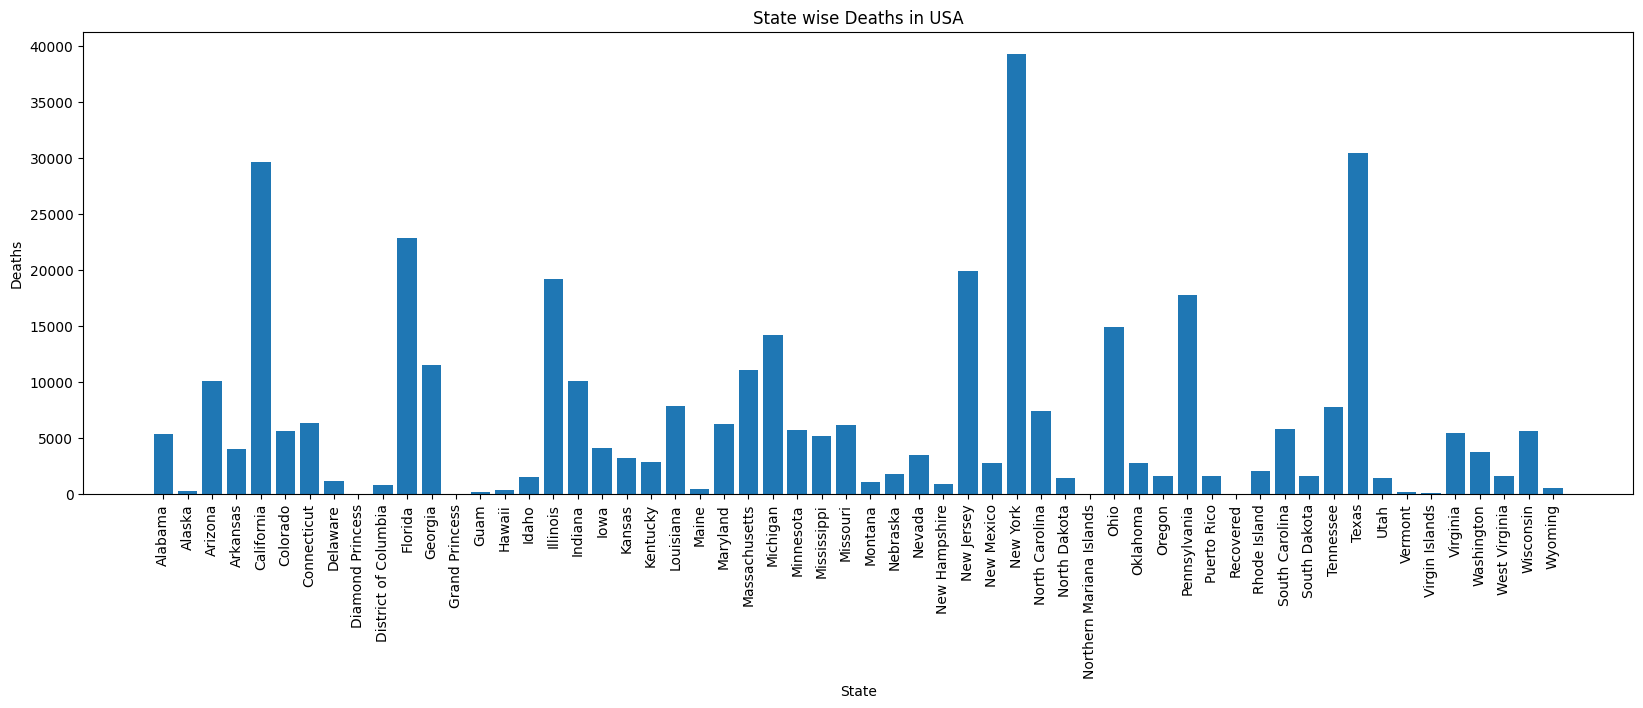

In [27]:
# Filter DF to include only the rows for the death in US:
us_data = covid_data[covid_data['Country_Region'] == 'US']

# Group the data by 'Province_State' and sum the 'Deaths'
us_deaths = us_data.groupby('Province_State')['Deaths'].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.bar(us_deaths['Province_State'], us_deaths['Deaths'])
plt.title('State wise Deaths in USA')
plt.xlabel('State')
plt.ylabel('Deaths')
plt.xticks(rotation=90)
plt.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

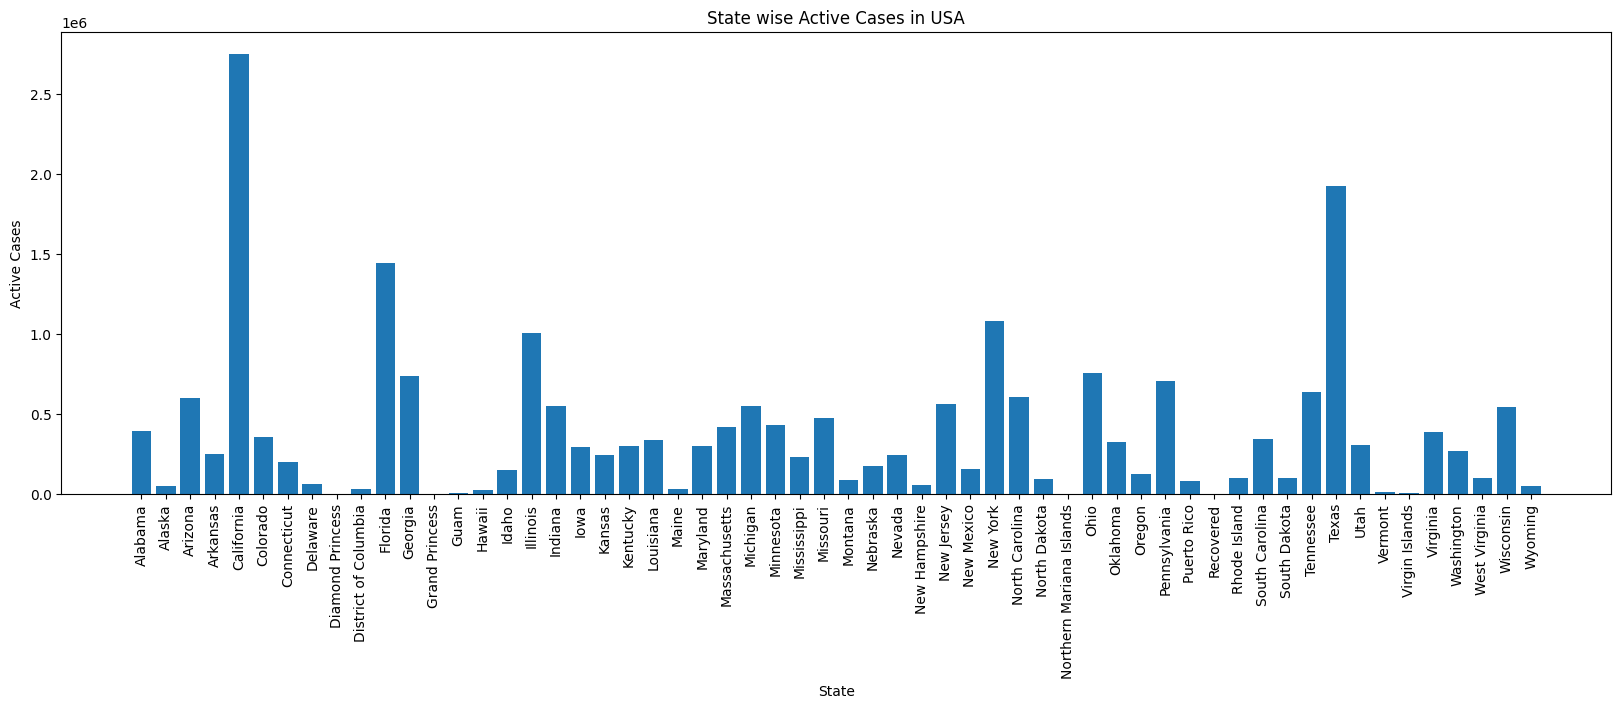

In [28]:
# Filtering the DF to include only the rows for the active cases in US:
us_data = covid_data[covid_data['Country_Region'] == 'US']

# Group data by 'Province_State' & sum the 'Active' cases:
us_active = us_data.groupby('Province_State')['Active'].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.bar(us_active['Province_State'], us_active['Active'])
plt.title('State wise Active Cases in USA')
plt.xlabel('State')
plt.ylabel('Active Cases')
plt.xticks(rotation=90)
plt.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

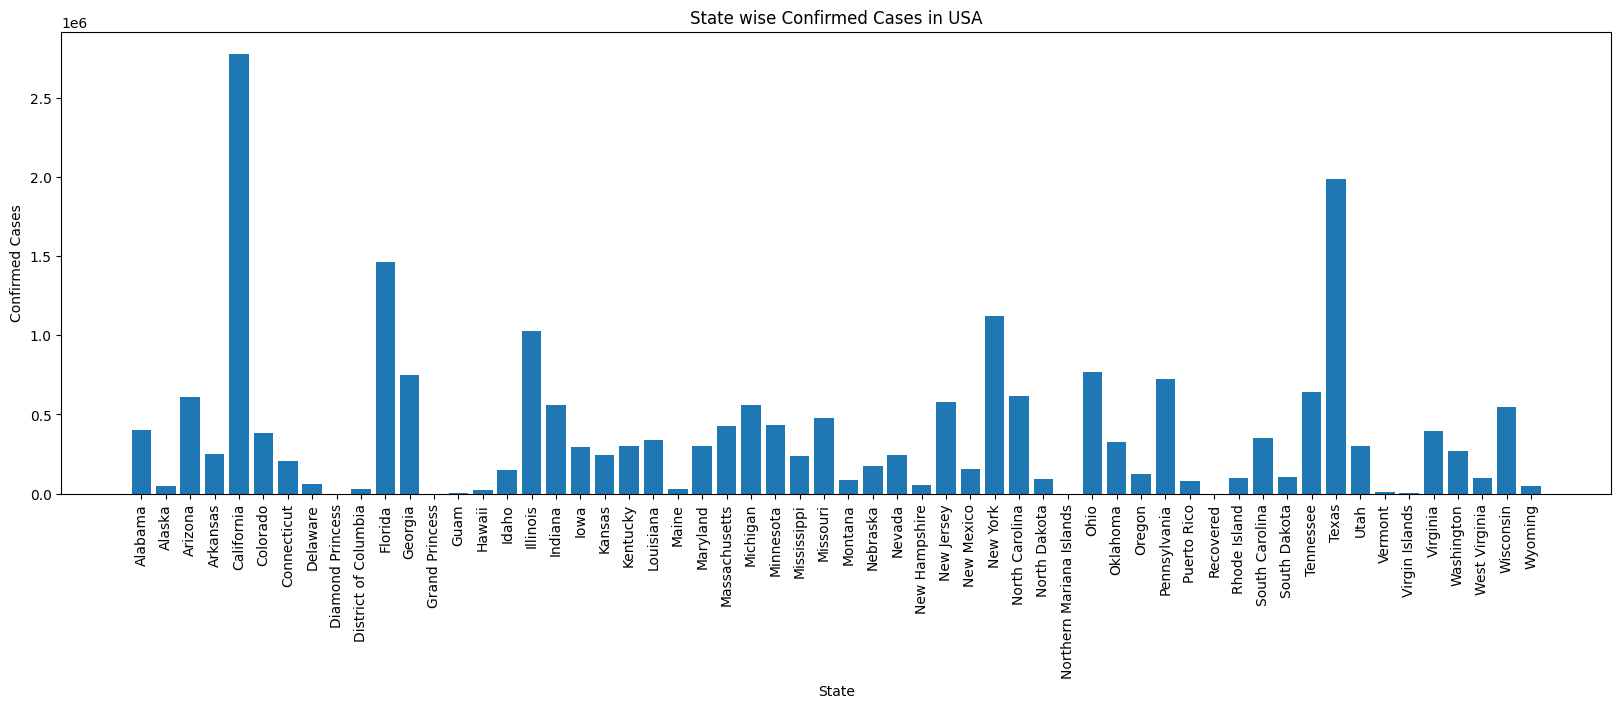

In [29]:
# Filter DF to include only the rows for the confirmed cases in US:
us_data = covid_data[covid_data['Country_Region'] == 'US']

# Group data by 'Province_State' & sum 'Confirmed' cases:
us_confirmed = us_data.groupby('Province_State')['Confirmed'].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.bar(us_confirmed['Province_State'], us_confirmed['Confirmed'])
plt.title('State wise Confirmed Cases in USA')
plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [24]:
import plotly.express as px
import plotly.io as pio

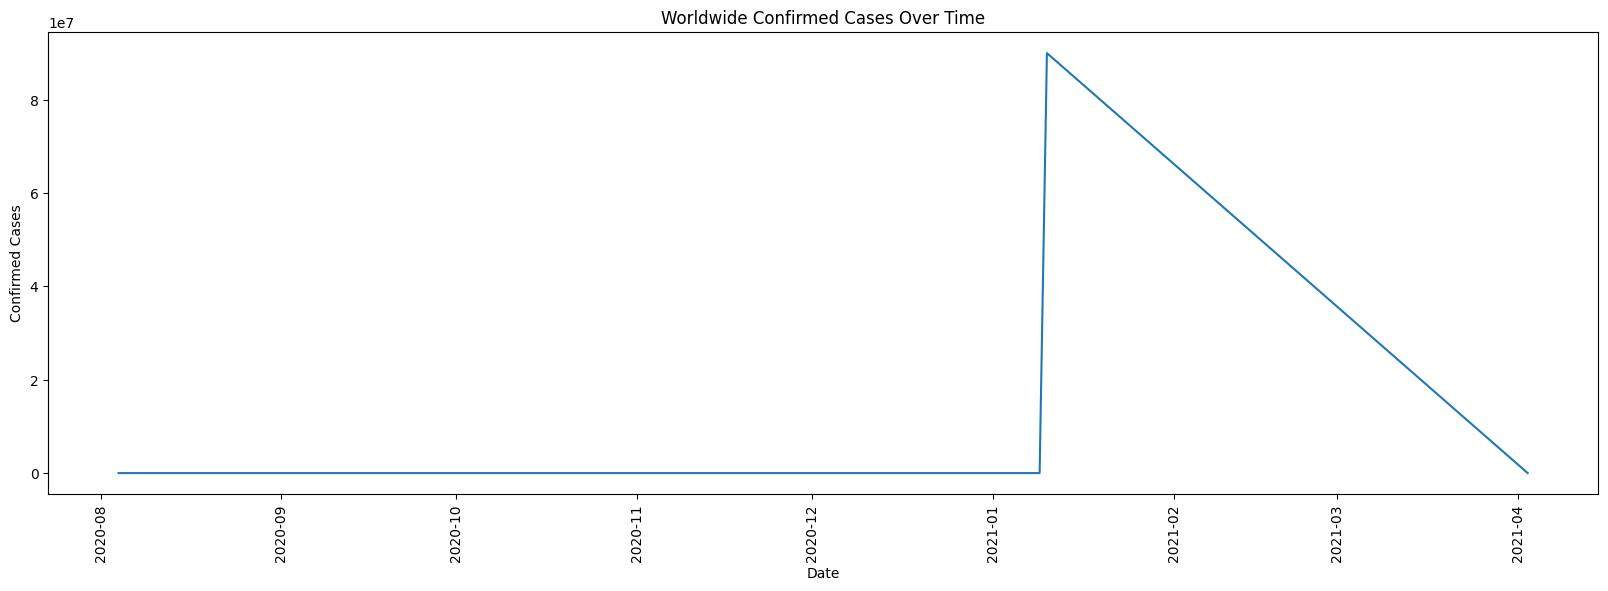

In [30]:
# Converting 'Last_Update' values to datetime:
covid_data['Last_Update'] = pd.to_datetime(covid_data['Last_Update'])

# Grouping data by 'Last_Update' & sum the 'Confirmed' cases:
worldwide_confirmed = covid_data.groupby('Last_Update')['Confirmed'].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(worldwide_confirmed['Last_Update'], worldwide_confirmed['Confirmed'])
plt.title('Worldwide Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.show()